In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression


global nbayc, nmayc, nbakc, \
apecoin_reward_q1, bayc_reward_q1, mayc_reward_q1, bakc_reward_q1, \
apecoin_reward_q2, bayc_reward_q2, mayc_reward_q2, bakc_reward_q2

nbayc = 10094
nmayc = 2042
nbakc = 856

apecoin_reward_q1 = 10500000
bayc_reward_q1 =    16486750
mayc_reward_q1 =     6671000
bakc_reward_q1 =     1342250

apecoin_reward_q2 =  9000000
bayc_reward_q2 =    14131500
mayc_reward_q2 =     5718000
bakc_reward_q2 =     1150500

apecoin_reward_q3 =  6000000
bayc_reward_q3 =     9421000
mayc_reward_q3 =     3812000
bakc_reward_q3 =      767000

apecoin_reward_q4 =  4500000
bayc_reward_q4 =     7065750
mayc_reward_q4 =     2859000
bakc_reward_q4 =      575250

# read apecoin staking data
df = pd.read_csv('apestake_dashboard - tvl.csv',thousands=',')
print(df.to_string())

# define my compounder
def ape_compound(t, nl, apr_l, comp_freq, comp_cost):

    n = len(t)
    p = np.zeros(n)
    
    p[0] = 0
    q = 0
    
    for j in range(1,n):
        p[j] = p[j-1] * (1+ apr_l[3,j] / 365) # ape pool compunding
        
        # nft reward 
        q += ( nl[0]*nbayc*apr_l[0,j] + nl[1]*nmayc*apr_l[1,j] + nl[2]*nbakc*apr_l[2,j] ) / 365 
        
        if j%comp_freq == 0 :
            
            p[j] += q - comp_cost 
            q = 0 # reset compounder
            
    return p

                date  bayc_tvl  mayc_tvl  bakc_tvl  apecoin_tvl
0    2023-04-02 0:00  45627657  17914027   3497017     61309590
1    2023-04-01 0:00  45384836  17910947   3489958     60746231
2    2023-03-31 0:00  45289177  17812422   3479574     60064536
3    2023-03-30 0:00  45039747  17726359   3475982     59441089
4    2023-03-29 0:00  44891732  17662648   3464809     58817854
5    2023-03-28 0:00  44689136  17623403   3458771     58488039
6    2023-03-27 0:00  44487572  17582868   3443651     57337558
7    2023-03-26 0:00  44557426  17471195   3441870     56689042
8    2023-03-25 0:00  44623718  17322418   3435188     56616389
9    2023-03-24 0:00  44626547  17221189   3428675     56199826
10   2023-03-23 0:00  44511340  17159740   3423907     55695471
11   2023-03-22 0:00  44531088  17180643   3433044     54556333
12   2023-03-21 0:00  44675013  17232804   3437872     54254037
13   2023-03-20 0:00  44537086  17228413   3425348     54095114
14   2023-03-19 0:00  44624873  17189998

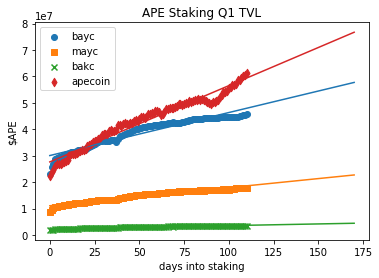

In [136]:
Y_bayc = df.iloc[:,1].values.reshape(-1,1)
Y_mayc = df.iloc[:,2].values.reshape(-1,1)
Y_bakc = df.iloc[:,3].values.reshape(-1,1)
Y_apecoin = df.iloc[:,4].values.reshape(-1,1)

X = np.arange(len(Y_bayc)).reshape(-1,1)[::-1]

'''
bayc_apr = df.iloc[:,1].values.reshape(-1,1)
mayc_apr = df.iloc[:,2].values.reshape(-1,1)
bakc_apr = df.iloc[:,3].values.reshape(-1,1)
apecoin_apr = df.iloc[:,4].values.reshape(-1,1)
'''

bayc_tvl = LinearRegression().fit(X, Y_bayc)
mayc_tvl = LinearRegression().fit(X, Y_mayc)
bakc_tvl = LinearRegression().fit(X, Y_bakc)
apecoin_tvl = LinearRegression().fit(X, Y_apecoin)


t_q1 = np.arange(len(Y_bayc)+60)
X_pred = t_q1.reshape(-1,1)
Y_bayc_pred = bayc_tvl.predict(X_pred) 
Y_mayc_pred = mayc_tvl.predict(X_pred) 
Y_bakc_pred = bakc_tvl.predict(X_pred) 
Y_apecoin_pred = apecoin_tvl.predict(X_pred) 

fig, ax = plt.subplots()
ax.scatter(X,Y_bayc, marker = 'o', label='bayc')
ax.scatter(X,Y_mayc, marker = 's', label='mayc')
ax.scatter(X,Y_bakc, marker = 'x', label='bakc' )
ax.scatter(X,Y_apecoin, marker = 'd', label='apecoin')

ax.plot(X_pred,Y_bayc_pred)
ax.plot(X_pred,Y_mayc_pred)
ax.plot(X_pred,Y_bakc_pred)
ax.plot(X_pred,Y_apecoin_pred)
ax.legend()

ax.set_title('APE Staking Q1 TVL')
ax.set_xlabel('days into staking')
ax.set_ylabel('$APE')

plt.savefig('apestaking_tvl_q1.png',dpi=300,  facecolor='w')

In [137]:
def compute_apr(y0,y1,y2,y3):
    
    n = len(y0)
    a0 = np.zeros([n,1])
    a1 = np.zeros([n,1])
    a2 = np.zeros([n,1])
    a3 = np.zeros([n,1])
    
    
    a0[-91:,:] = bayc_reward_q1*4 / y0[-91:,:]
    a0[:-91,:] = bayc_reward_q2*4 / y0[:-91,:]
    
    a1[-91:,:] = mayc_reward_q1*4 / y1[-91:,:]
    a1[:-91,:] = mayc_reward_q2*4 / y1[:-91,:]
    
    a2[-91:,:] = bakc_reward_q1*4 / y2[-91:,:]
    a2[:-91,:] = bakc_reward_q2*4 / y2[:-91,:]
    
    a3[-91:,:] = apecoin_reward_q1*4 / y3[-91:,:]
    a3[:-91,:] = apecoin_reward_q2*4 / y3[:-91,:]
    
    return a0,a1,a2,a3

In [138]:
bayc_apr, mayc_apr, bakc_apr, apecoin_apr = compute_apr(Y_bayc, Y_mayc, Y_bakc, Y_apecoin)

array([[1.23885388],
       [1.27676485],
       [1.31597873],
       [0.58718383]])

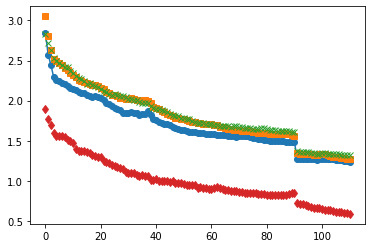

In [153]:
plt.plot(bayc_apr[::-1],'o-')
plt.plot(mayc_apr[::-1],'s')
plt.plot(bakc_apr[::-1],'x')
plt.plot(apecoin_apr[::-1], 'd')
curr_apr = np.array([bayc_apr[0], mayc_apr[0], bakc_apr[0], apecoin_apr[0]])
curr_apr

In [140]:
def ape_compound1( apr, a, d0 ):
    
    n = 91 - d0
    
    y = np.zeros(n)
    
    y[0] = nbayc*a[0] + nmayc*a[1] + nbakc*a[2] + a[3]
    
    q = a[3]
    
    for j in range(1,n):
        
        p =  (nbayc*a[0]*apr[0]  + nmayc*a[1]*apr[1] + nbakc*a[2])/365
        
        y[j] = y[j-1] + p + q * apr[3]/365
        
        q = y[j] - y[j-1]
        
    return y, y[-1] - (nbayc*a[0] + nmayc*a[1] + nbakc*a[2])
        
            
    
    
    

In [154]:
apr = curr_apr
a = np.array([12,28,6,16570])
q2,q2a = ape_compound1(apr,a,20)
q2,q2a

(array([200010.        , 200661.851606  , 201288.09532331, 201914.29784463,
        202540.50029967, 203166.7027546 , 203792.90520954, 204419.10766447,
        205045.31011941, 205671.51257434, 206297.71502928, 206923.91748421,
        207550.11993915, 208176.32239408, 208802.52484902, 209428.72730395,
        210054.92975889, 210681.13221382, 211307.33466876, 211933.53712369,
        212559.73957863, 213185.94203356, 213812.14448849, 214438.34694343,
        215064.54939836, 215690.7518533 , 216316.95430823, 216943.15676317,
        217569.3592181 , 218195.56167304, 218821.76412797, 219447.96658291,
        220074.16903784, 220700.37149278, 221326.57394771, 221952.77640265,
        222578.97885758, 223205.18131251, 223831.38376745, 224457.58622238,
        225083.78867732, 225709.99113225, 226336.19358719, 226962.39604212,
        227588.59849706, 228214.80095199, 228841.00340693, 229467.20586186,
        230093.4083168 , 230719.61077173, 231345.81322667, 231972.0156816 ,
        2325

In [155]:
apr = curr_apr * 20/30
a = np.array([12,28,6,q2a])
q3,q3a = ape_compound1(apr,a,0)
q3,q3a

(array([243869.86232536, 244356.15938148, 244778.16804972, 245200.10776984,
        245622.047416  , 246043.98706209, 246465.92670817, 246887.86635426,
        247309.80600035, 247731.74564643, 248153.68529252, 248575.62493861,
        248997.56458469, 249419.50423078, 249841.44387687, 250263.38352295,
        250685.32316904, 251107.26281512, 251529.20246121, 251951.1421073 ,
        252373.08175338, 252795.02139947, 253216.96104556, 253638.90069164,
        254060.84033773, 254482.77998382, 254904.7196299 , 255326.65927599,
        255748.59892207, 256170.53856816, 256592.47821425, 257014.41786033,
        257436.35750642, 257858.29715251, 258280.23679859, 258702.17644468,
        259124.11609077, 259546.05573685, 259967.99538294, 260389.93502903,
        260811.87467511, 261233.8143212 , 261655.75396728, 262077.69361337,
        262499.63325946, 262921.57290554, 263343.51255163, 263765.45219772,
        264187.3918438 , 264609.33148989, 265031.27113598, 265453.21078206,
        2658

In [156]:
apr = curr_apr * 15/30
a = np.array([12,28,6,q3a])
q4,q4a = ape_compound1(apr,a,0)
q4,q4a

(array([281908.85697943, 282307.69467926, 282627.64863973, 282947.53914916,
        283267.42960756, 283587.32006592, 283907.21052427, 284227.10098263,
        284546.99144098, 284866.88189934, 285186.77235769, 285506.66281605,
        285826.5532744 , 286146.44373276, 286466.33419111, 286786.22464947,
        287106.11510782, 287426.00556618, 287745.89602453, 288065.78648289,
        288385.67694124, 288705.5673996 , 289025.45785795, 289345.34831631,
        289665.23877466, 289985.12923302, 290305.01969137, 290624.91014973,
        290944.80060808, 291264.69106644, 291584.58152479, 291904.47198315,
        292224.3624415 , 292544.25289986, 292864.14335821, 293184.03381657,
        293503.92427492, 293823.81473328, 294143.70519163, 294463.59564999,
        294783.48610834, 295103.3765667 , 295423.26702505, 295743.15748341,
        296063.04794176, 296382.93840012, 296702.82885847, 297022.71931683,
        297342.60977518, 297662.50023354, 297982.39069189, 298302.28115025,
        2986

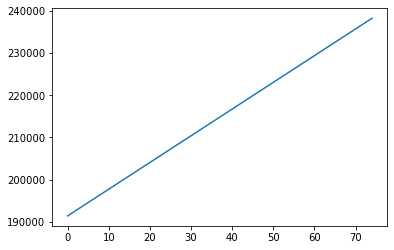

In [104]:
plt.plot(y)

In [157]:
q2.size

71

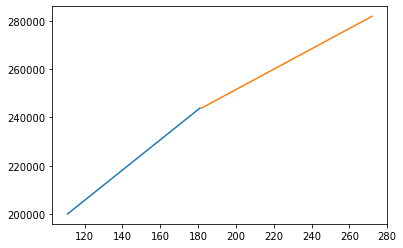

In [169]:
plt.plot(range(91+20,91*2), q2)
plt.plot(range(91*2,91*3),q3)

In [170]:
q2[-1],q3[0]

(243869.86232535934, 243869.86232535934)